In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def get_year_data(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = year

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]
    
    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures.columns = pd.date_range(start='2014-01-06', end='2014-12-29', freq='W-MON')
    df_cultures['yield'] = yield_by_culture
    return df_cultures

In [34]:
FILE = '../Сводная вегетация.xlsx'
SHEET = "2014"

df = pd.read_excel(FILE, sheetname=SHEET, header=1)

NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
CULTURE_COLUMN = 'Культура ' + SHEET
YIELD_COLUMN = 'Урожайность, т./га.'

df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
yield_by_culture = df_cultures[YIELD_COLUMN]
df_cultures = df_cultures[NDVI_COLUMNS]

df_cultures = df_cultures.apply(lambda x: x.interpolate(method='values'), axis=1)
df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
df_cultures = df_cultures[df_cultures.columns[::-1]]
df_cultures.columns = pd.date_range(start='2014-01-06', end='2014-12-29', freq='W-MON')
df_cultures['yield'] = yield_by_culture
df_cultures

TypeError: ("Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'", 'occurred at index Кукуруза')

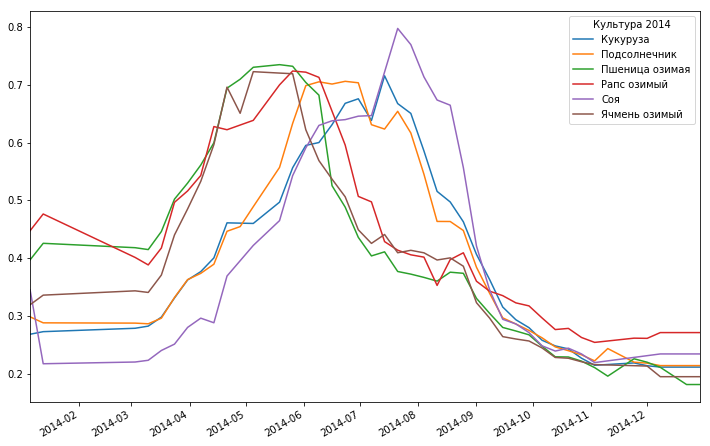

In [32]:
dfc14 = get_year_data('2014')
dfc14.drop('yield', axis=1, inplace=True)
dfc14.T.plot(figsize=(12,8))


In [12]:
from sklearn import svm
from sklearn import metrics
dfc14 = get_year_data('2014')
y = dfc14['yield']
X = dfc14.drop('yield', axis=1).as_matrix()

dfc15 = get_year_data('2015')
y_train = dfc15['yield']
X_train = dfc15.drop('yield', axis=1).as_matrix()

model = svm.SVR()
model.fit(X, y)
print(y)
model.predict(dfc15.drop('yield', axis=1).as_matrix())

Культура 2014
Кукуруза          3.049583
Подсолнечник      2.185962
Пшеница озимая    4.244634
Рапс озимый       2.335000
Соя               1.610000
Ячмень озимый     3.121111
Name: yield, dtype: float64


array([ 2.68139436,  2.66933979,  2.6667804 ,  2.70276995,  2.67514743,
        2.71115743])